In [47]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [60]:
df = pd.read_csv('Exasens.csv',skiprows=[1,2])
df

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,COPD,301-4,-320.61,-300.563531,-495.26,-464.171991,1,77,2,NaN,NaN,Male=1,Non-smoker=1
1,COPD,302-3,-325.39,-314.750360,-473.73,-469.263140,0,72,2,NaN,NaN,Female=0,Ex-smoker=2
2,COPD,303-3,-323.00,-317.436056,-476.12,-471.897667,1,73,3,NaN,NaN,NaN,Active-smoker=3
3,COPD,304-4,-327.78,-317.399670,-473.73,-468.856388,1,76,2,NaN,NaN,NaN,NaN
4,COPD,305-4,-325.39,-316.155785,-478.52,-472.869783,0,65,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Infected,I176,NaN,NaN,NaN,NaN,0,49,2,NaN,NaN,NaN,NaN
395,Infected,I177,NaN,NaN,NaN,NaN,0,37,1,NaN,NaN,NaN,NaN
396,Infected,I178,NaN,NaN,NaN,NaN,0,29,1,NaN,NaN,NaN,NaN
397,Infected,I179,NaN,NaN,NaN,NaN,1,51,1,NaN,NaN,NaN,NaN


In [49]:
diagnosis = df['Diagnosis']
features = df.drop(['ID', 'Diagnosis','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'], axis=1)
features.head()

,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking
0,-320.61,-300.563531,-495.26,-464.171991,1,77,2
1,-325.39,-314.750360,-473.73,-469.263140,0,72,2
2,-323.00,-317.436056,-476.12,-471.897667,1,73,3
3,-327.78,-317.399670,-473.73,-468.856388,1,76,2
4,-325.39,-316.155785,-478.52,-472.869783,0,65,2


In [50]:
features = features.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
features_imputed

array([[-320.61      , -300.5635307 , -495.26      , ...,    1.        ,
          77.        ,    2.        ],
       [-325.39      , -314.7503595 , -473.73      , ...,    0.        ,
          72.        ,    2.        ],
       [-323.        , -317.4360556 , -476.12      , ...,    1.        ,
          73.        ,    3.        ],
       ...,
       [-314.9418    , -304.77967675, -473.0022    , ...,    0.        ,
          29.        ,    1.        ],
       [-314.9418    , -304.77967675, -473.0022    , ...,    1.        ,
          51.        ,    1.        ],
       [-314.9418    , -304.77967675, -473.0022    , ...,    0.        ,
          40.        ,    1.        ]])

In [51]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

In [52]:
cov_matrix = np.cov(features_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [53]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [54]:
manual_pca_2d = features_scaled.dot(eigenvectors[:, :2])
manual_pca_3d = features_scaled.dot(eigenvectors[:, :3])


In [55]:
pca = PCA()
sklearn_pca_result = pca.fit_transform(features_scaled)
sklearn_pca_2d = sklearn_pca_result[:, :2]
sklearn_pca_3d = sklearn_pca_result[:, :3]

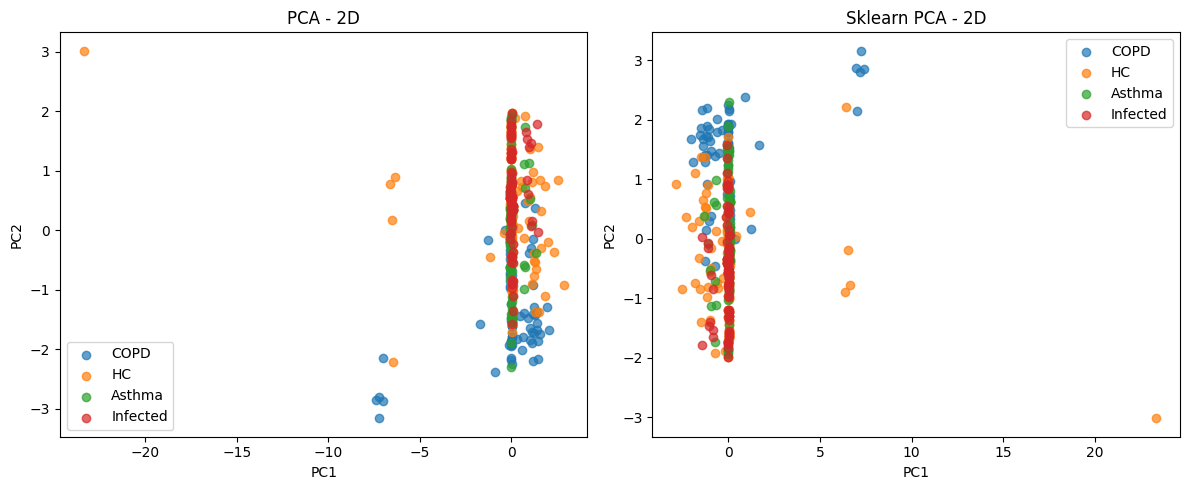

In [56]:
# Визуализация 2D
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for diagnosis_type in diagnosis.unique():
    mask = diagnosis == diagnosis_type
    plt.scatter(manual_pca_2d[mask, 0], manual_pca_2d[mask, 1],
                label=diagnosis_type, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - 2D')
plt.legend()

plt.subplot(1, 2, 2)
for diagnosis_type in diagnosis.unique():
    mask = diagnosis == diagnosis_type
    plt.scatter(sklearn_pca_2d[mask, 0], sklearn_pca_2d[mask, 1],
                label=diagnosis_type, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Sklearn PCA - 2D')
plt.legend()

plt.tight_layout()
plt.show()

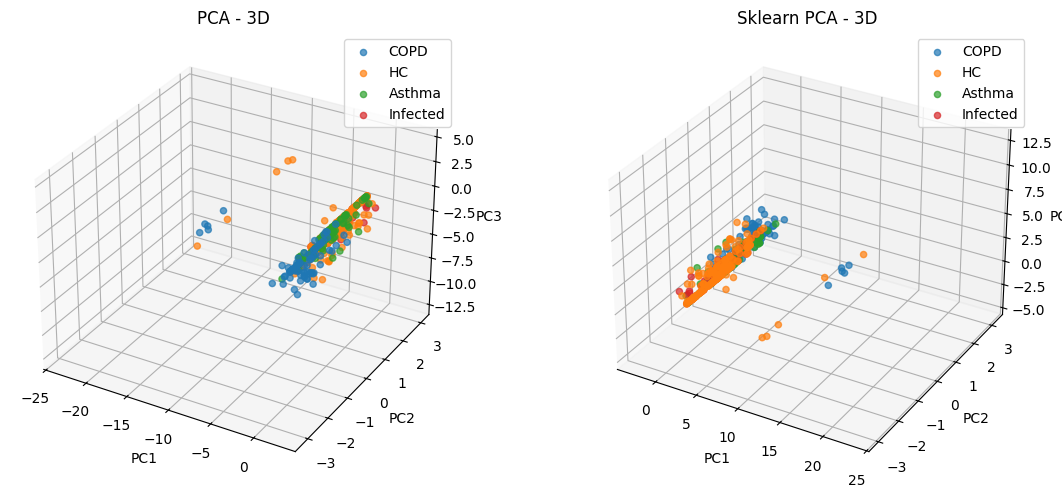

In [57]:
# Визуализация 3D
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
for diagnosis_type in diagnosis.unique():
    mask = diagnosis == diagnosis_type
    ax1.scatter(manual_pca_3d[mask, 0], manual_pca_3d[mask, 1], manual_pca_3d[mask, 2],
                label=diagnosis_type, alpha=0.7)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('PCA - 3D')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
for diagnosis_type in diagnosis.unique():
    mask = diagnosis == diagnosis_type
    ax2.scatter(sklearn_pca_3d[mask, 0], sklearn_pca_3d[mask, 1], sklearn_pca_3d[mask, 2],
                label=diagnosis_type, alpha=0.7)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title('Sklearn PCA - 3D')
ax2.legend()

plt.tight_layout()
plt.show()

In [58]:
# Вычисление потерь информации
total_variance_manual = np.sum(eigenvalues)
variance_2d_manual = np.sum(eigenvalues[:2])
variance_3d_manual = np.sum(eigenvalues[:3])

loss_2d_manual = (1 - variance_2d_manual / total_variance_manual) * 100
loss_3d_manual = (1 - variance_3d_manual / total_variance_manual) * 100

total_variance_sklearn = np.sum(pca.explained_variance_)
variance_2d_sklearn = np.sum(pca.explained_variance_[:2])
variance_3d_sklearn = np.sum(pca.explained_variance_[:3])

loss_2d_sklearn = (1 - variance_2d_sklearn / total_variance_sklearn) * 100
loss_3d_sklearn = (1 - variance_3d_sklearn / total_variance_sklearn) * 100

print("Потери информации при снижении размерности:")
print(f"PCA - 2D: {loss_2d_manual:.2f}%")
print(f"PCA - 3D: {loss_3d_manual:.2f}%")
print(f"Sklearn PCA - 2D: {loss_2d_sklearn:.2f}%")
print(f"Sklearn PCA - 3D: {loss_3d_sklearn:.2f}%")

Потери информации при снижении размерности:
PCA - 2D: 41.81%
PCA - 3D: 25.61%
Sklearn PCA - 2D: 41.81%
Sklearn PCA - 3D: 25.61%
